# **Getting Started**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/data science/Data_Visualization

/content/drive/.shortcut-targets-by-id/1a0dGn_q8jeq7IiJZvLAU5caPOKpQ5adP/Data_Visualization


In [ ]:
#import all files
data_1 = pd.read_csv('Sales_January_2019.csv')
data_2 = pd.read_csv('Sales_February_2019.csv')
data_3 = pd.read_csv('Sales_March_2019.csv')
data_4 = pd.read_csv('Sales_April_2019.csv')
data_5 = pd.read_csv('Sales_May_2019.csv')
data_6 = pd.read_csv('Sales_June_2019.csv')
data_7 = pd.read_csv('Sales_July_2019.csv')
data_8 = pd.read_csv('Sales_August_2019.csv')
data_9 = pd.read_csv('Sales_September_2019.csv')
data_10 = pd.read_csv('Sales_October_2019.csv')
data_11 = pd.read_csv('Sales_November_2019.csv')
data_12 = pd.read_csv('Sales_December_2019.csv')

#concat them into 1 file
data = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12],axis=0)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# **Understanding & Viewing the Data**

In [ ]:
#Look at the data
print("***This is how the data looks like***")
data.info()

***This is how the data looks like***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
#Check whether the data set has missing values:
print("***Below indicates all missing values each column has***")
null_data = data.isnull().sum()
null_data[0:8]


***Below indicates all missing values each column has***


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# **Turn Shits Into Flowers (aka. Data Clean-up)**

In [ ]:
#make sure that we take all the null values out
data_cleaned = data.dropna()
#check if there is any NaN values left
print("Null Values:")
data_cleaned[data_cleaned.isna().any(axis=1)]
print("Data ordered by 'Order Date' ")
data_cleaned = data_cleaned[data_cleaned['Order Date'].str[0:2] != 'Or']
data_cleaned

Null Values:
Data ordered by 'Order Date' 


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
#Now, we will have to convert any column with special values to its type 
data_cleaned['Quantity Ordered'] = data_cleaned['Quantity Ordered'].astype('int64')
data_cleaned['Price Each'] = data_cleaned['Price Each'].astype('float')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# convert date, time for easier pick-out
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'])
data_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


**Our Data's statistic: **
We have: 


*   186850 records 
*   6 columns cateogircal type
*   The total of missing value that we have is 0.29167%


1.   Order ID: 178438 unique value(s)
2.   Product: 20 unique value(s)
3.   Quantity Ordered :  10  unique value(s)
4.   Price Each :  24  unique value(s)
5.   Order Date :  142396  unique value(s)
6.   Purchase Address :  140788  unique value(s)

Our data's date & time was input altogether in 1 column. Now, we would like to split them up for easier pick-out 

In [ ]:
def add_feature(data):
    
    def get_city(address):
        return address.split(',')[1]
    
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data 

# and see it
data_cleaned = add_feature(data_cleaned)
data_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,21,25,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,14,15,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,13,33,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,20,33,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,11,59,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019,12,20,58,14.95,San Francisco (CA)
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019,12,12,1,7.68,Los Angeles (CA)
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019,12,6,43,400.00,Seattle (WA)
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019,12,10,39,11.99,Dallas (TX)


# **Making Graphs**

### **Sales through all months in 2019**

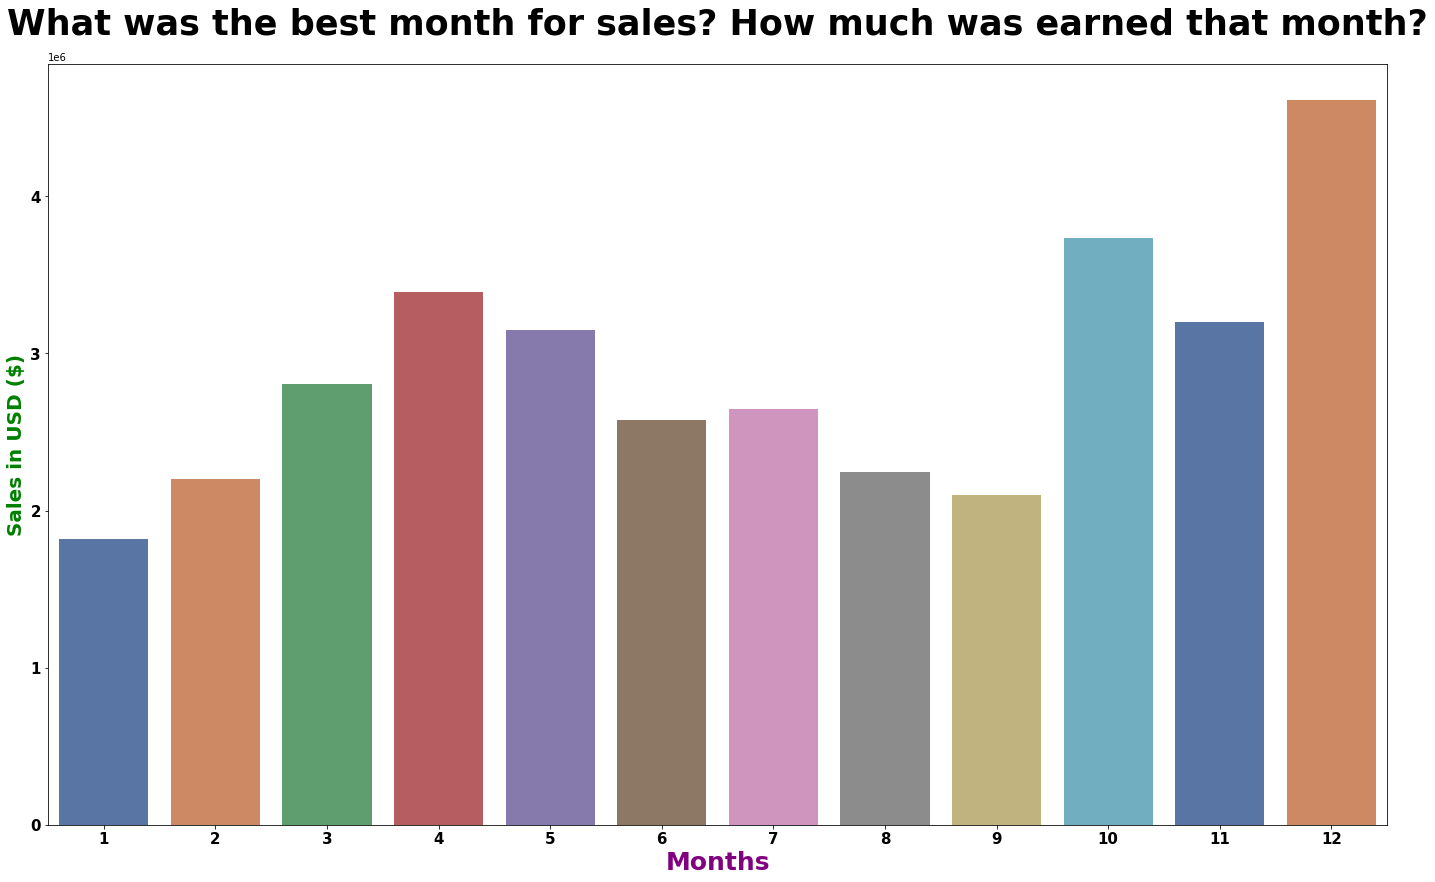

In [ ]:

# group the Month cols
sum_of_month_and_earned = data_cleaned.groupby('Month').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=sum_of_month_and_earned.index, # x-axis
    y=sum_of_month_and_earned["Sales"], # y-axis
    data=sum_of_month_and_earned, # data
    palette="deep" # palette
)
plt.title( # title
    "What was the best month for sales? How much was earned that month?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Months", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### **Sales through all cities in 2019**

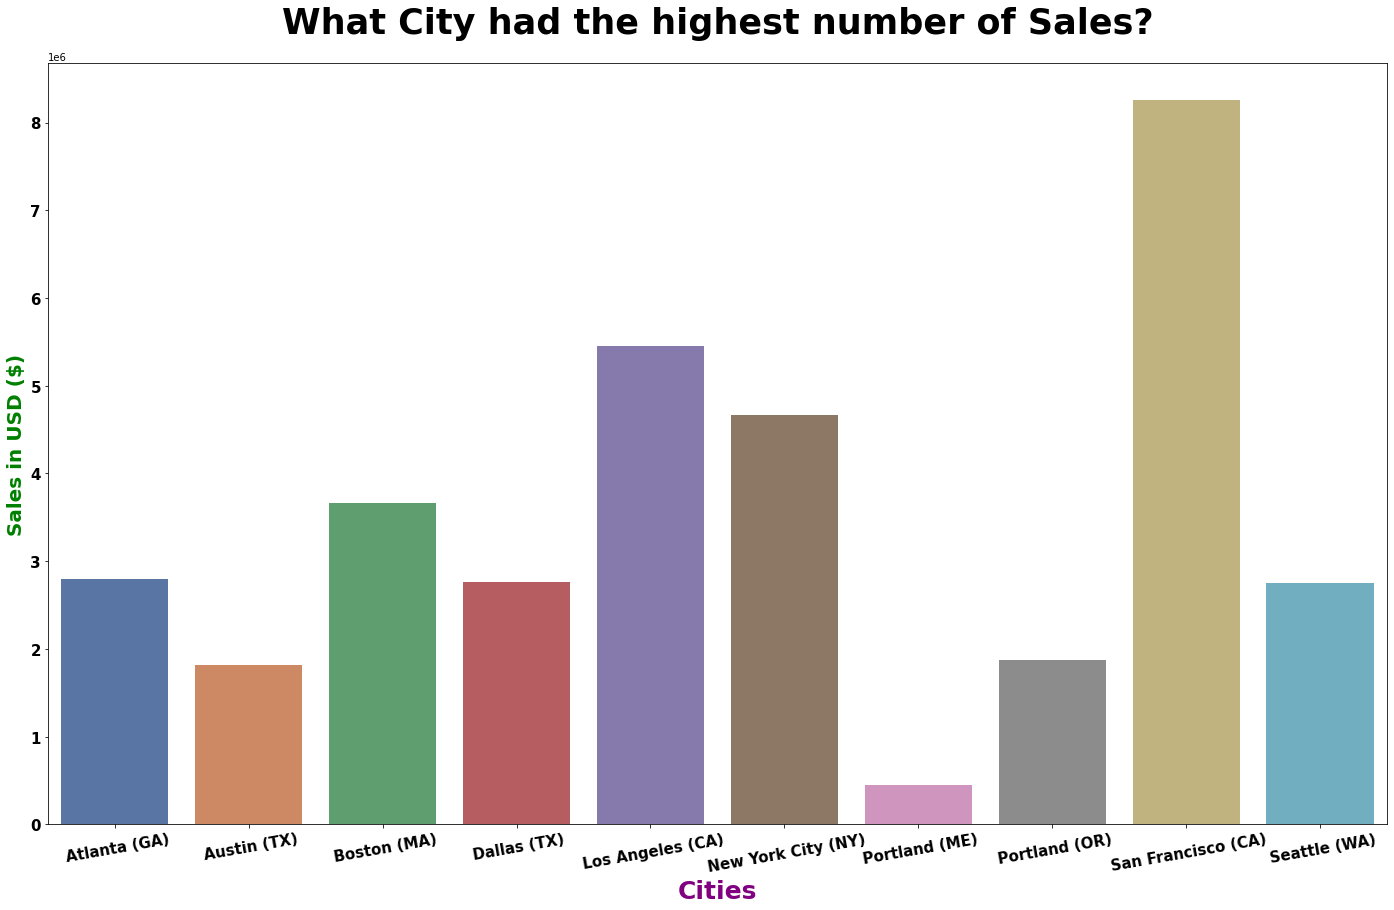

In [ ]:
# group of the highest number of sales in city
highest_number_of_sales = data_cleaned.groupby('Cities').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["Sales"], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "What City had the highest number of Sales?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Cities", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### **Sales through each hour of the day**

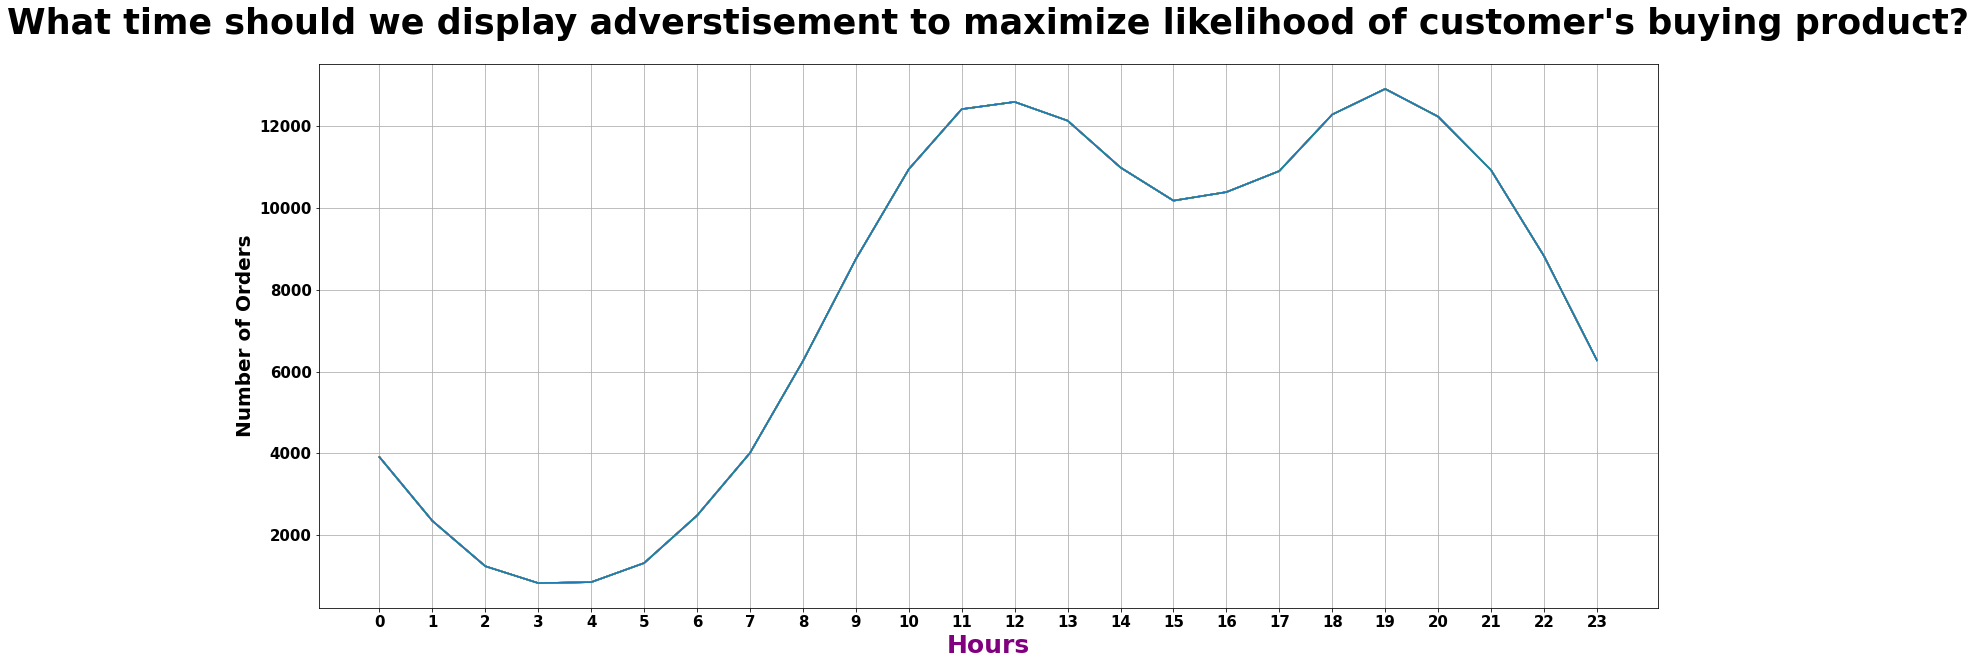

In [ ]:

# let's prepare the value for the x-axis
hours = [hour for hour, df in data_cleaned.groupby('Hour')]
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot 
plt.plot( # plot
    hours, # x-axis
    data_cleaned.groupby(['Hour']).count() # data
)
# let's add grid
plt.grid(True)
plt.title( # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30
)
plt.xlabel( # x-label
    "Hours", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    ticks=hours, # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Number of Orders", 
    weight="bold", # weight
    color="black", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);